# Summary

An image classification project was conducted using images of cats and dogs. A Convolutional Neural Network (CNN) utilizing Fast.ai/Pytorch was trained and tested on a total of 10,000 images.

The CNN reached an accuracy of 97.5% on the validation set.

# Loading in the data

In [4]:
!pip install -Uqq fastbook
import fastbook as fb

     |████████████████████████████████| 727kB 7.9MB/s 
     |████████████████████████████████| 51kB 8.9MB/s 
     |████████████████████████████████| 194kB 15.6MB/s 
     |████████████████████████████████| 1.2MB 43.3MB/s 
     |████████████████████████████████| 61kB 9.8MB/s 


In [8]:
from google.colab import drive
drive.mount('/content/drive')
pth = '/content/drive/MyDrive/Python/_Git/CNN/cat_dog'

Mounted at /content/drive


In [17]:
pics = fb.get_image_files(pth)
pics

(#10007) [Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4036.jpg'),Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4007.jpg'),Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4034.jpg'),Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4033.jpg'),Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4032.jpg'),Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4028.jpg'),Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4002.jpg'),Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4017.jpg'),Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4018.jpg'),Path('/content/drive/MyDrive/Python/_Git/CNN/cat_dog/test_set/cats/cat.4049.jpg')...]

# Creating the model

In [30]:
cnn_DBlock = fb.DataBlock(
    blocks=(fb.ImageBlock, fb.CategoryBlock), 
    get_items=fb.get_image_files, 
    splitter=fb.GrandparentSplitter(train_name='training_set', valid_name='test_set'),
    get_y=fb.parent_label,
    item_tfms=fb.RandomResizedCrop(124, min_scale=0.5),
    batch_tfms=fb.aug_transforms())

In [31]:
dls = cnn_DBlock.dataloaders(pth)

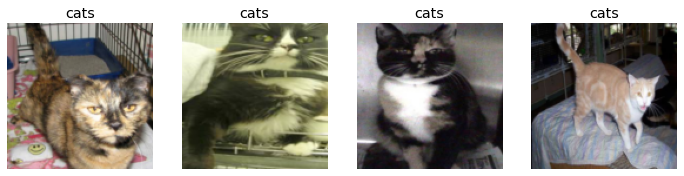

In [32]:
dls.valid.show_batch(max_n=4, nrows=1)

# Training the model

In [33]:
learn = fb.cnn_learner(dls,fb.resnet18, metrics=fb.accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.351510,0.191470,0.924500,00:53


epoch,train_loss,valid_loss,accuracy,time
0,0.193024,0.125412,0.951500,00:54
1,0.135863,0.090685,0.967500,00:54
2,0.096876,0.070891,0.976500,00:53
3,0.077497,0.071206,0.974500,00:54


# Making single predictions

In [63]:
#Get the list of pics
pth = '/content/drive/MyDrive/Python/_Git/CNN/cat_dog/single_prediction'
pics = fb.get_image_files(pth)

In [64]:
#Make a single prediction by choosing which picture in the list to predict
pic = pics[6]
print ('Picture: %s' % pic)
learn.predict(pic)

Picture: /content/drive/MyDrive/Python/_Git/CNN/cat_dog/single_prediction/Evey.JPG


('cats', tensor(0), tensor([1.0000e+00, 9.1743e-09]))

In [66]:
#Taking a look at the architecture of the model
learn.summary()

Sequential (Input shape: 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 62 x 62   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                      